# An Accidents Analysis Based on Auto Insurance Claims Data

Data source:
Auto Insurance Claims Data
https://www.kaggle.com/buntyshah/auto-insurance-claims-data

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/VVYing/StockerBot/master/insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [2]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [3]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)

No handles with labels found to put in legend.


In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

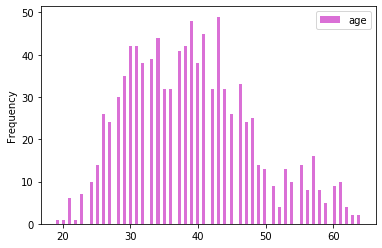

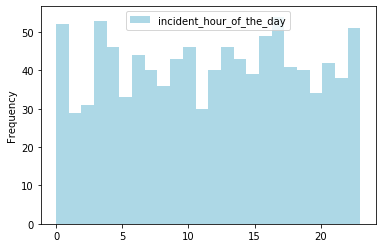

In [5]:
df.plot(kind="hist", y="age", bins=100, color="orchid")
df.plot(kind="hist", y="incident_hour_of_the_day", bins=24, color="lightblue")
plt.show()

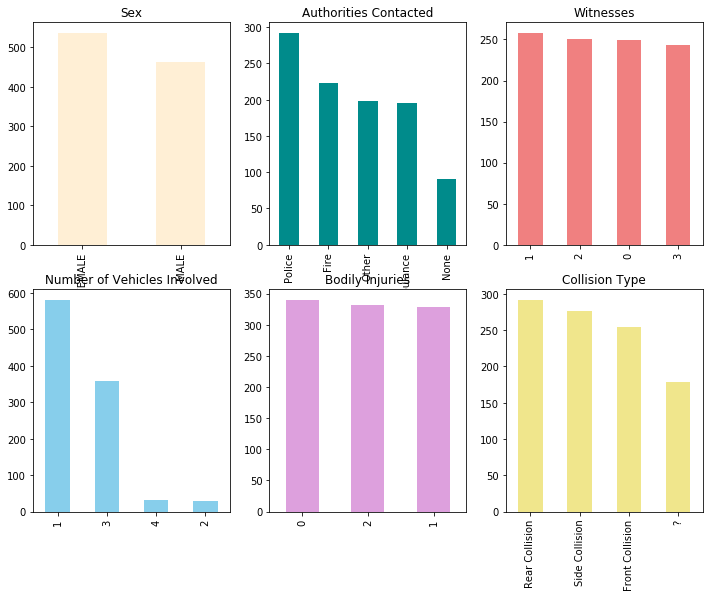

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))
df['insured_sex'].value_counts().plot(kind='bar', color="papayawhip", ax=axes[0][0], title="Sex")
df['authorities_contacted'].value_counts().plot(kind='bar', color="darkcyan", ax=axes[0][1], title="Authorities Contacted")
df['witnesses'].value_counts().plot(kind='bar', color="lightcoral", ax=axes[0][2], title="Witnesses")
df['number_of_vehicles_involved'].value_counts().plot(kind='bar', color="skyblue", ax=axes[1][0], title="Number of Vehicles Involved")
df['bodily_injuries'].value_counts().plot(kind='bar', color="plum", ax=axes[1][1], title="Bodily Injuries")
df['collision_type'].value_counts().plot(kind='bar', color="khaki", ax=axes[1][2], title="Collision Type")
plt.show()

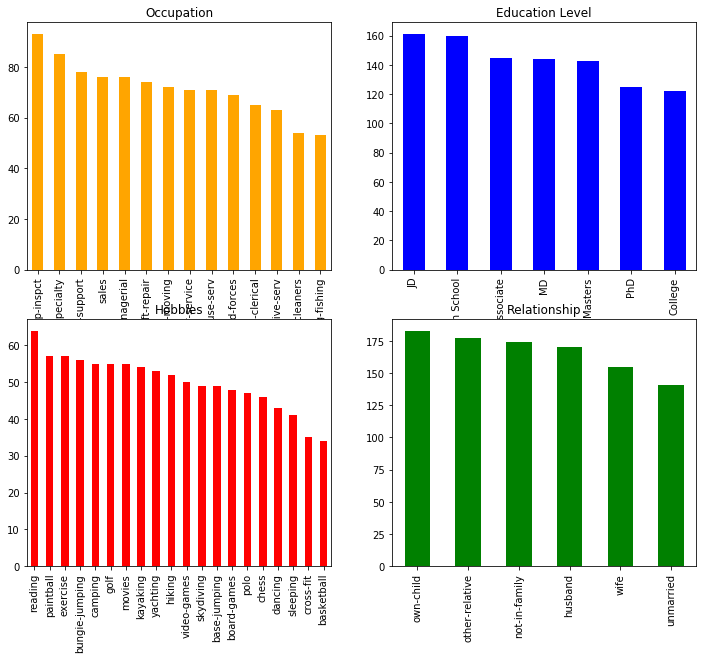

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df['insured_occupation'].value_counts().plot(kind='bar', color="orange", ax=axes[0][0], title="Occupation")
df['insured_education_level'].value_counts().plot(kind='bar', color="b", ax=axes[0][1], title="Education Level")
df['insured_hobbies'].value_counts().plot(kind='bar', color="r", ax=axes[1][0], title="Hobbies")
df['insured_relationship'].value_counts().plot(kind='bar', color="g", ax=axes[1][1], title="Relationship")
plt.show()

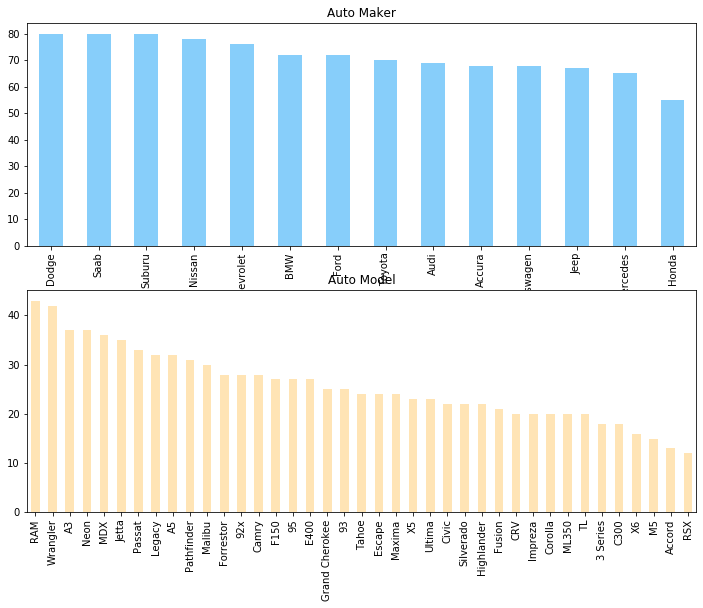

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))
df['auto_make'].value_counts().plot(kind='bar', color="lightskyblue", ax=axes[0], title="Auto Maker")
df['auto_model'].value_counts().plot(kind='bar', color="moccasin", ax=axes[1], title="Auto Model")

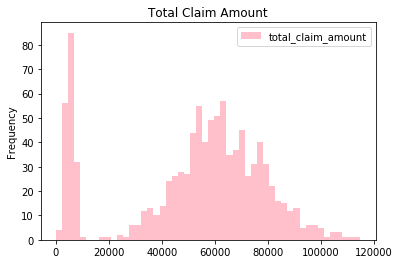

In [9]:
df.plot(kind="hist", y="total_claim_amount", bins=50, color="pink", title="Total Claim Amount")

In [10]:
df["auto_year"] = 2015 - df["auto_year"]

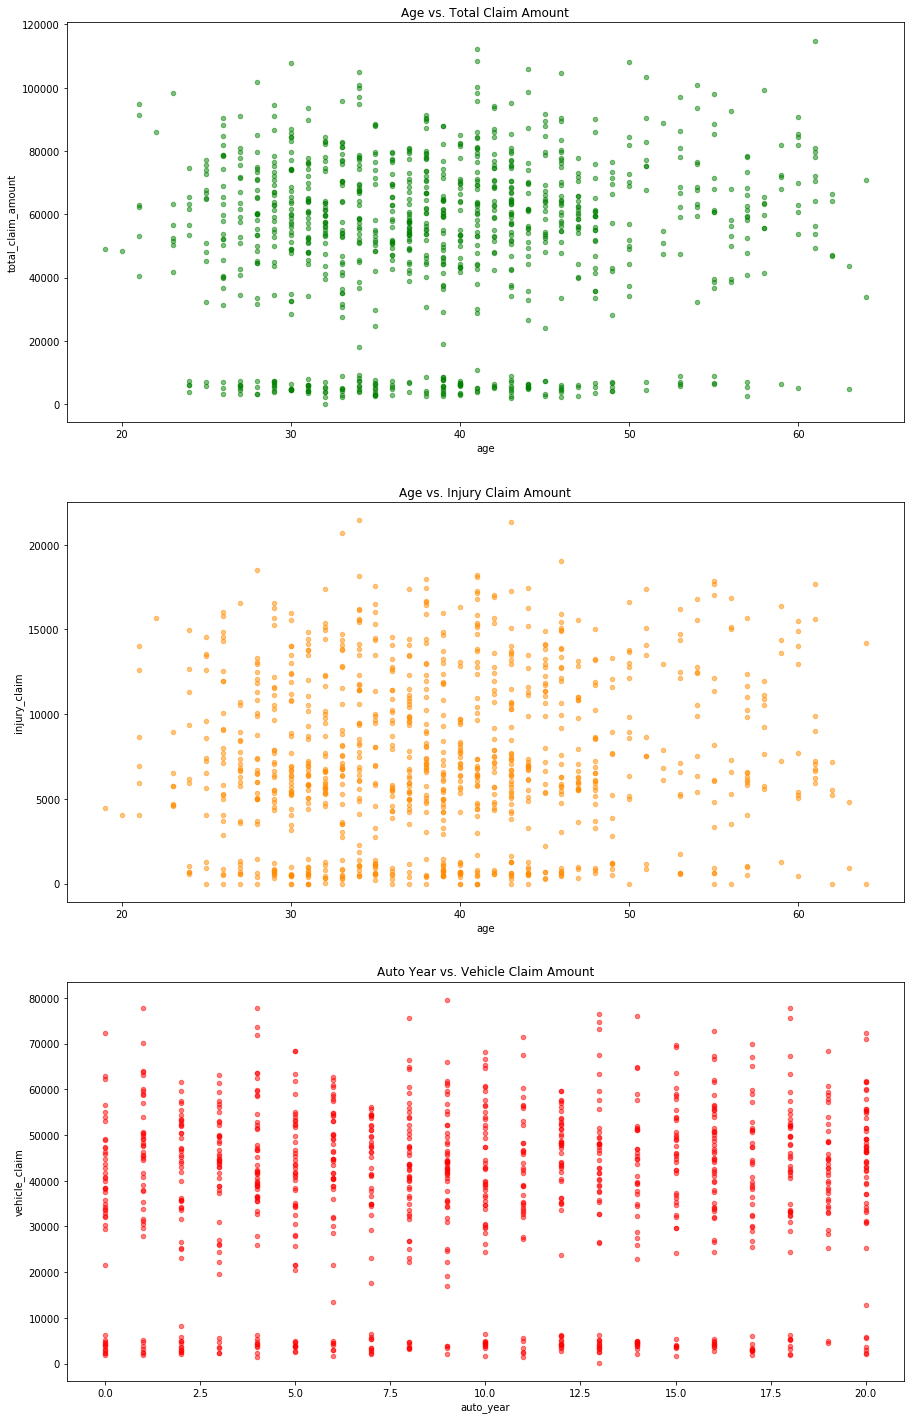

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 25))
df.plot(kind='scatter', x='age', y='total_claim_amount', alpha=0.5, color='green', ax=axes[0], title="Age vs. Total Claim Amount")
df.plot(kind='scatter', x='age', y='injury_claim', alpha=0.5, color='darkorange', ax=axes[1], title="Age vs. Injury Claim Amount")
df.plot(kind='scatter', x='auto_year', y='vehicle_claim', alpha=0.5, color='red', ax=axes[2], title="Auto Year vs. Vehicle Claim Amount")

In [12]:
df["policy_state"].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [13]:
df["insured_sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [14]:
df['insured_sex'] = df['insured_sex'].map(lambda s :1  if s == 'FEMALE' else 0)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,11,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,8,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,8,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,6,N,NaN


In [15]:
df.rename(columns = {'policy_annual_premium' : 'premium', 'insured_sex' : 'sex', 'incident_hour_of_the_day' : 'hour', 'number_of_vehicles_involved' : 'vehicles_count'}, inplace = True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,11,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,8,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,8,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,6,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,9,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,0,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,19,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,17,N,NaN


In [16]:
PL = df[["months_as_customer", "premium", "capital-gains", "capital-loss", "total_claim_amount", "auto_year"]]

In [17]:
PL['PL'] = PL['total_claim_amount'] - PL['months_as_customer'] / 12 * PL['premium']
PL

C:\Users\yingl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,months_as_customer,premium,capital-gains,capital-loss,total_claim_amount,auto_year,PL
0,328,1406.91,53300,0,71610,11,33154.460000
1,228,1197.22,0,0,5070,8,-17677.180000
2,134,1413.14,35100,0,34650,8,18869.936667
3,256,1415.74,48900,-62400,63400,1,33197.546667
4,228,1583.91,66000,-46000,6500,6,-23594.290000
...,...,...,...,...,...,...,...
995,3,1310.80,0,0,87200,9,86872.300000
996,285,1436.79,70900,0,108480,0,74356.237500
997,130,1383.49,35100,0,67500,19,52512.191667
998,458,1356.92,0,0,46980,17,-4809.113333


In [18]:
PL.describe()

,months_as_customer,premium,capital-gains,capital-loss,total_claim_amount,auto_year,PL
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,1256.406150,25126.100000,-26793.700000,52761.94000,9.897000,31396.110803
std,115.113174,244.167395,27872.187708,28104.096686,26401.53319,6.015861,28609.096730
min,0.000000,433.330000,0.000000,-111100.000000,100.00000,0.000000,-48515.443333
25%,115.750000,1089.607500,0.000000,-51500.000000,41812.50000,5.000000,14471.937292
50%,199.500000,1257.200000,0.000000,-23250.000000,58055.00000,10.000000,35353.536250
75%,276.250000,1415.695000,51025.000000,0.000000,70592.50000,15.000000,52518.001667
max,479.000000,2047.590000,100500.000000,0.000000,114920.00000,20.000000,98696.934167


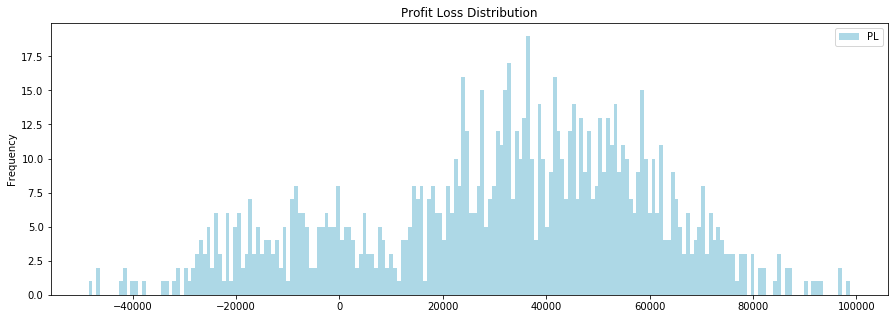

In [19]:
PL.plot(kind="hist", y="PL", bins=200, color="lightblue", figsize=(15, 5), title="Profit Loss Distribution")

# Data Modeling

In [20]:
claim = df[["age", "sex", "hour", "vehicles_count", "bodily_injuries", "witnesses", "total_claim_amount", "auto_year"]]
claim

,age,sex,hour,vehicles_count,bodily_injuries,witnesses,total_claim_amount,auto_year
0,48,0,5,1,1,2,71610,11
1,42,0,8,1,0,0,5070,8
2,29,1,7,3,2,3,34650,8
3,41,1,5,1,1,2,63400,1
4,44,0,20,1,0,1,6500,6
...,...,...,...,...,...,...,...,...
995,38,1,20,1,0,1,87200,9
996,41,1,23,1,2,3,108480,0
997,34,1,4,3,2,3,67500,19
998,62,0,2,1,0,1,46980,17


In [21]:
X = claim.drop(['total_claim_amount'], axis = 1)
y = claim.total_claim_amount
X

,age,sex,hour,vehicles_count,bodily_injuries,witnesses,auto_year
0,48,0,5,1,1,2,11
1,42,0,8,1,0,0,8
2,29,1,7,3,2,3,8
3,41,1,5,1,1,2,1
4,44,0,20,1,0,1,6
...,...,...,...,...,...,...,...
995,38,1,20,1,0,1,9
996,41,1,23,1,2,3,0
997,34,1,4,3,2,3,19
998,62,0,2,1,0,1,17


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.13092167403235988


In [23]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,2.347992,-1.077675,1.302118,-0.825992,1.229008,1.327686,0.200712
1,0.084504,-1.077675,-0.684837,-0.825992,0.016171,-0.453646,1.363775
2,0.192289,-1.077675,0.166715,1.137539,-1.196666,-0.453646,-0.297744
3,1.701281,-1.077675,-0.684837,-0.825992,1.229008,1.327686,-1.128504
4,-0.454422,0.927924,1.444044,1.137539,1.229008,-1.344312,-0.796200


In [25]:
pd.DataFrame(y_train).head()

,total_claim_amount
253,53640
667,46200
85,58300
969,6600
75,51210


In [26]:
from sklearn.linear_model import LinearRegression  
# Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  
# Create a instance for Linear Regression model

multiple_linear_reg.fit(X_train, y_train)  
# Fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  
# Create a PolynomialFeatures instance in degree 3

x_train_poly = polynomial_features.fit_transform(X_train)  
# Fit and transform the training data to polynomial

x_test_poly = polynomial_features.fit_transform(X_test)  
# Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  
# Create a instance for Linear Regression model

polynomial_reg.fit(x_train_poly, y_train)  
# Fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [28]:
from sklearn.tree import DecisionTreeRegressor  

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
# Create a instance for Decision Tree Regression model

decision_tree_reg.fit(X_train, y_train)  
# Fit data to the model

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=13, splitter='best')

In [29]:
from sklearn.ensemble import RandomForestRegressor  

random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=13)  
# Create a instance for Random Forest Regression model

random_forest_reg.fit(X_train, y_train)  
# Fit data to the model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=13, verbose=0,
                      warm_start=False)

In [30]:
from sklearn.svm import SVR 

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  
# Create a instance for Support Vector Regression model

support_vector_reg.fit(X_train, y_train)  
# Fit data to the model

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
from sklearn.model_selection import cross_val_predict   
from sklearn.metrics import r2_score   
from sklearn.metrics import mean_squared_error   
from math import sqrt   

### Evaluating Multiple Linear Regression Model

In [32]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -4.045386425414506
Testing Accuracy for Multiple Linear Regression Model:  -3.506667004230131
RMSE for Training Data:  58593.991563789925
RMSE for Testing Data:  57820.86609517857
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.08178737884375231


###  Evaluating Polynomial Regression Model

In [33]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.2424185549995158
Testing Accuracy for Polynomial Regression Model:  0.11303339758036224
RMSE for Training Data:  22704.9490460707
RMSE for Testing Data:  25651.365661890206
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.04609695277314485


###  Evaluating Decision Tree Regression Model

In [34]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.3170380069421176
Testing Accuracy for Decision Tree Regression Model:  0.19171406721596318
RMSE for Training Data:  21557.784930245612
RMSE for Testing Data:  24487.213522818744
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.1119358846106343


### Evaluating Random Forest Regression Model

In [35]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.3609610539856438
Testing Accuracy for Random Forest Regression Model:  0.2768679509997424
RMSE for Training Data:  20853.04740226702
RMSE for Testing Data:  23161.445644899173
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.20165576214168557


### Evaluating Support Vector Regression Model

In [36]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.044230670848333986
Testing Accuracy for Support Vector Regression Model:  0.030192785293189472
RMSE for Training Data:  25502.47978014277
RMSE for Testing Data:  26822.51910308736
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.05526190172395484


In [37]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-4.045386,-3.506667,58593.991564,57820.866095,0.081787
Polynomial Regression,fit_intercept=False,0.242419,0.113033,22704.949046,25651.365662,0.046097
Decision Tree Regression,max_depth=5,0.317038,0.191714,21557.784930,24487.213523,0.111936
Random Forest Regression,"n_estimators=400, max_depth=5",0.360961,0.276868,20853.047402,23161.445645,0.201656
Support Vector Regression,"kernel=”linear”, C=1000",0.044231,0.030193,25502.479780,26822.519103,0.055262


#### Low training accuracy reveals that the dataset didn't fit any of these statistical models very well. The recorded features could provide enough information on how and why the accidents happened. Therefore installing sensors and cameras on vehicles would greatly help understand how and why accidents happened.